This is an auto-generated keras model code.

In [1]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense, merge
from keras.models import Model, Sequential
from keras.utils.visualize_util import plot
from keras.layers import TimeDistributed

textinput1 = Input(shape=(100,),dtype='int32')
embedlayer1 = Embedding(input_dim=10000,output_dim=256,input_length=100)(textinput1)
lstmlayer1 = LSTM(256)(embedlayer1)










imageinput1 = Input(shape=(3,224,224))
convolayer1 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(imageinput1)
convolayer2 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(convolayer1)
maxpoollayer1 = MaxPooling2D((2,2),dim_ordering="th")(convolayer2)
convolayer3 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(maxpoollayer1)
convolayer4 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(convolayer3)
maxpoollayer2 = MaxPooling2D((2,2),dim_ordering="th")(convolayer4)
convolayer5 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(maxpoollayer2)
convolayer6 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(convolayer5)
convolayer7 = Convolution2D(64,3,3,activation='relu',border_mode='same',dim_ordering='th')(convolayer6)
maxpoollayer3 = MaxPooling2D((2,2),dim_ordering="th")(convolayer7)
flatten1 = Flatten()(maxpoollayer3)



textmod = Model(output = lstmlayer1 ,input = [textinput1], name = 'textmod')
textinput2 = Input(shape=(100,),dtype='int32')
usetextmod = textmod(textinput2)


videoinput1 = Input(shape=(100,3,224,224))


imagemod = Model(output = flatten1 ,input = [imageinput1], name = 'imagemod')
useimagemod = imagemod
timedistributelayer1 = TimeDistributed(useimagemod)(videoinput1)
videncoded = LSTM(256)(timedistributelayer1)
mergelayer2 = merge([usetextmod,videncoded],mode='concat')
denselayer2 = Dense(1000,activation='softmax')(mergelayer2)



mergelayer1 = merge([lstmlayer1,flatten1],mode='concat')
denselayer1 = Dense(1000,activation='softmax')(mergelayer1)
videomod=Model(output = denselayer2 ,input = [videoinput1,textinput2])
textandimagemod=Model(output = denselayer1 ,input = [imageinput1,textinput1])
plot(textmod, to_file = 'plots/textmod.png', show_layer_names=True, show_shapes=True)
plot(imagemod, to_file = 'plots/imagemod.png', show_layer_names=True, show_shapes=True)
plot(videomod, to_file = 'plots/videomod.png', show_layer_names=True, show_shapes=True)
plot(textandimagemod, to_file = 'plots/textandimagemod.png', show_layer_names=True, show_shapes=True)

Using TensorFlow backend.


/Users/asitangm/nn/lib/python2.7/site-packages/keras/engine/topology.py:368: UserWarning: The `regularizers` property of layers/models is deprecated. Regularization losses are now managed via the `losses` layer/model property.
  warnings.warn('The `regularizers` property of '


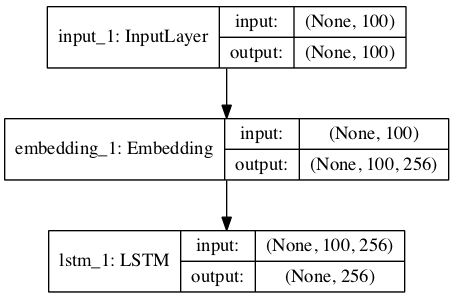

In [1]:
from IPython.display import Image
Image(filename='plots/textmod.png', embed=True,format='png')


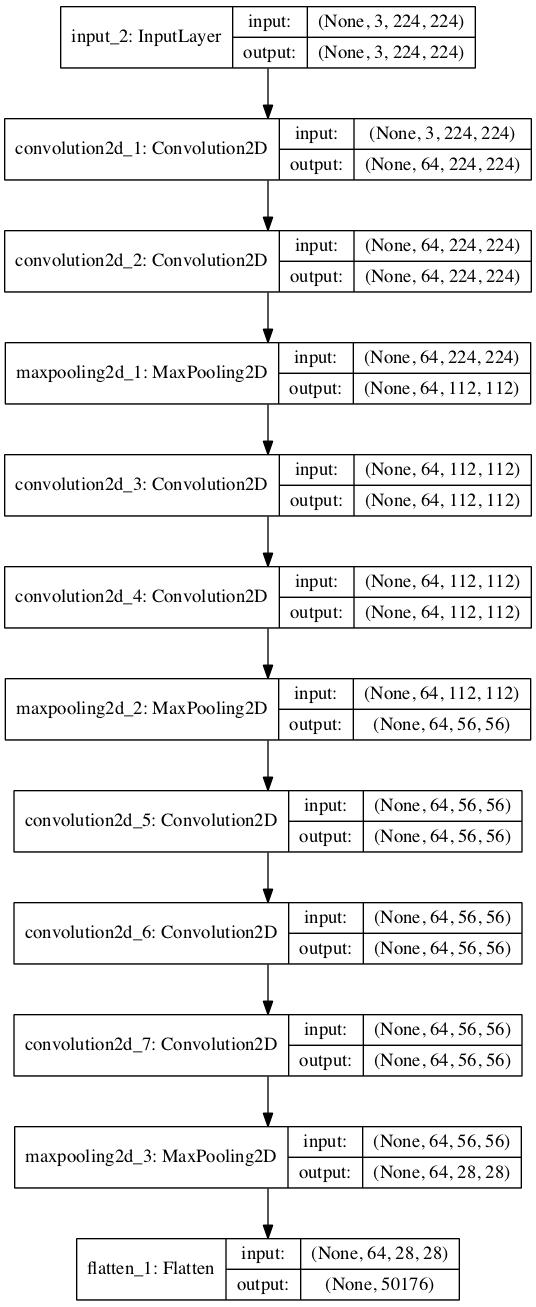

In [1]:
from IPython.display import Image
Image(filename='plots/imagemod.png', embed=True,format='png')


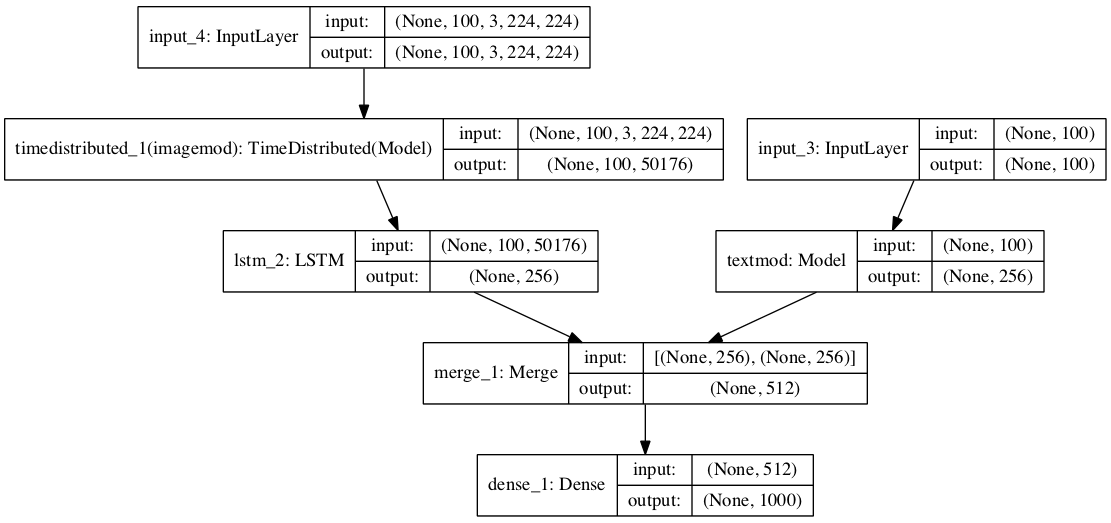

In [1]:
from IPython.display import Image
Image(filename='plots/videomod.png', embed=True,format='png')


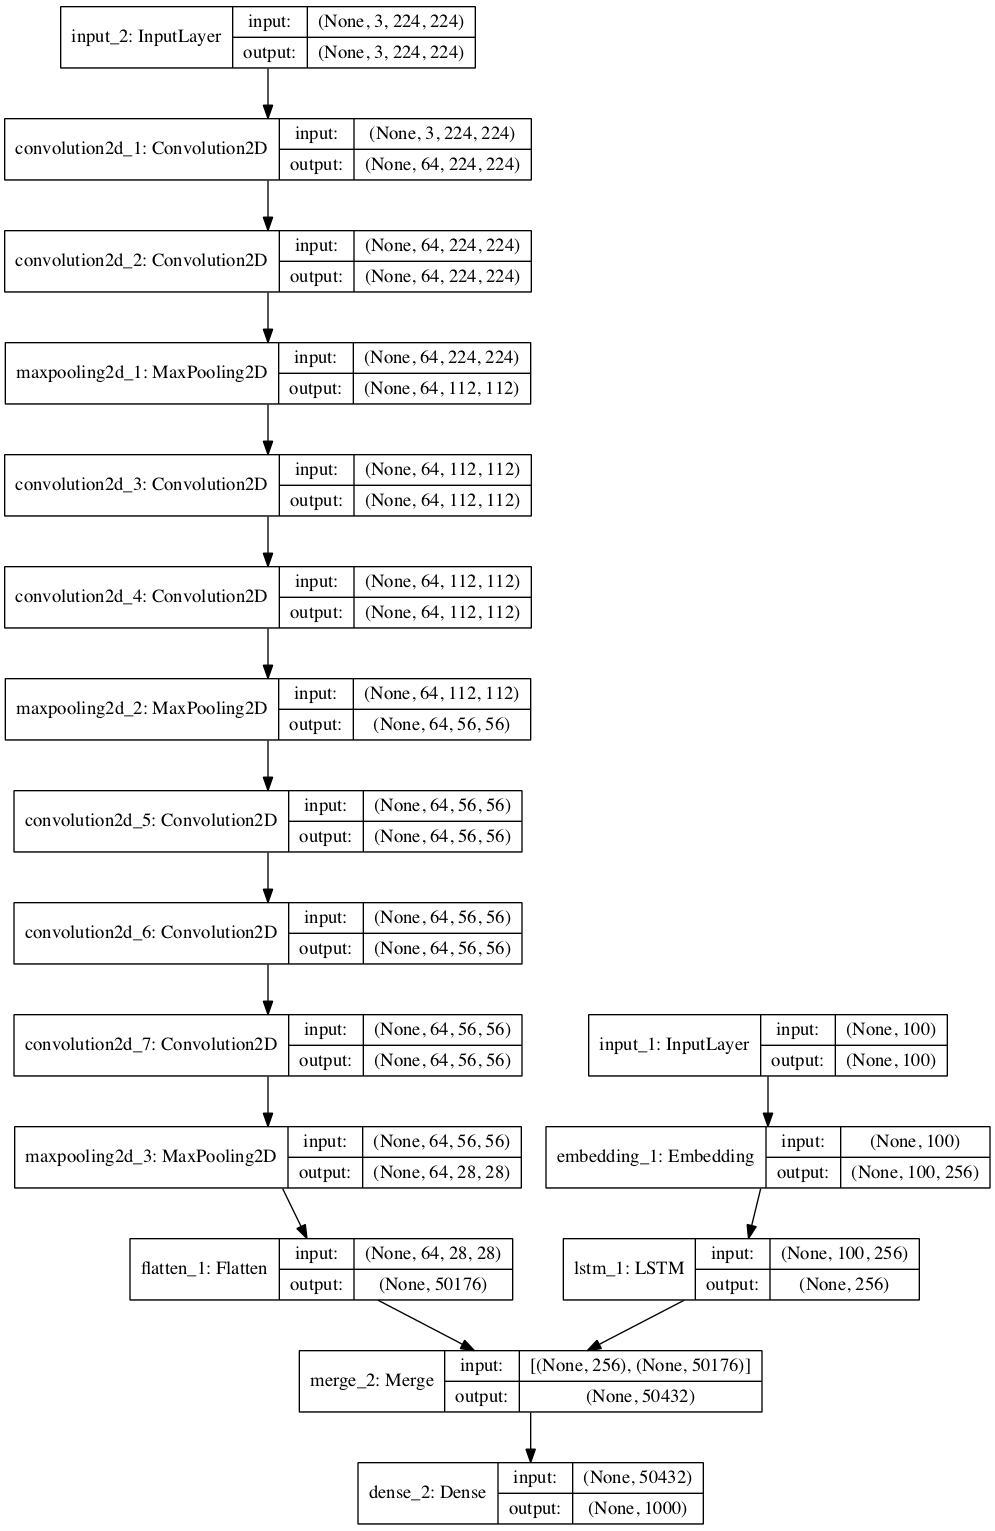

In [1]:
from IPython.display import Image
Image(filename='plots/textandimagemod.png', embed=True,format='png')
